In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
df = pd.read_excel("SUBSET accepted 21-23.xlsx") #students accepted subset

In [3]:
to_drop = ['Last Name', 'First Name', 'Preferred First Name', 'EmplID', 'NetID']
df.drop(to_drop, axis=1, inplace=True)

In [4]:
df.columns

Index(['Campus ID', 'COUNTRY (Program)', 'CITY (Program)', 'COUNTRY (Session)',
       'CITY (Session)', 'Advising Location', 'IAP Official Title',
       'IAP Short Descriptor', 'Year', 'Duration', 'Application Status',
       'Application Start Date...17', 'STUDENT RESIDENCY', 'Gender',
       'Cumulative GPA', 'Citizenship', 'World Region',
       'Application Status Date', 'Application Status History',
       'Student Ethnicity', 'SIS Citizenship', 'First Generation',
       'Sponsoring Agency (NAP Students)',
       'Transcript Institution (NAP Students)', 'Application Start Date...30',
       'Virtual Program', 'Virtual Session', 'Excluded from CISI/Exempt',
       'gpa_buckets'],
      dtype='object')

In [5]:
df[df["Student Ethnicity"].apply(lambda x: "Black/African American (Primary)" in x)]
df[df["Student Ethnicity"].apply(lambda x: "White (Primary)" in x)]
df[df["Student Ethnicity"].apply(lambda x: "White (Primary)" not in x)]
df[df["First Generation"].apply(lambda x: "Y" in x)]
firstgen_min = df[(df["First Generation"]=="Y") & (df["Student Ethnicity"].isin(["White (Primary)"])==False)]

In [6]:
df["gpa_buckets"].value_counts()

gpa_buckets
3.5 - 3.75    487
3.75 - 4.0    368
3.25 - 3.5    285
3 - 3.25       98
2.75 - 3       29
2.5 - 2.75      8
< 2.5           2
Name: count, dtype: int64

In [7]:
df[df["Student Ethnicity"].apply(lambda x: "White (Primary)" not in x)]["gpa_buckets"].value_counts()

gpa_buckets
3.75 - 4.0    76
3.5 - 3.75    76
3.25 - 3.5    71
3 - 3.25      23
2.75 - 3      14
2.5 - 2.75     3
< 2.5          1
Name: count, dtype: int64

In [8]:
df[df["Student Ethnicity"].apply(lambda x: "White (Primary)" in x)]["gpa_buckets"].value_counts()

gpa_buckets
3.5 - 3.75    411
3.75 - 4.0    292
3.25 - 3.5    214
3 - 3.25       75
2.75 - 3       15
2.5 - 2.75      5
< 2.5           1
Name: count, dtype: int64

In [9]:
df[df["First Generation"].apply(lambda x: "Y" in x)]["gpa_buckets"].value_counts()

gpa_buckets
3.5 - 3.75    44
3.25 - 3.5    36
3.75 - 4.0    27
3 - 3.25       9
2.75 - 3       3
2.5 - 2.75     2
< 2.5          1
Name: count, dtype: int64

In [10]:
#ONLY FOR NUMERICAL DATA

from sklearn.tree import DecisionTreeClassifier

def dummy_three(value):
    if value in ['3.75 - 4.0', '3.5 - 3.75', '3 - 3.25', '3.25 - 3.5']:
        return 1
    else: # value in ['2.75 - 3', '2.5 - 2.75', '< 2.5']:
        return 0

#df["GPA dummy"] = df['gpa_buckets'].apply(dummy_three)   
#clf = DecisionTreeClassifier(random_state=0)
#X = df[:29]        
#y = df["GPA dummy"]
#clf.fit(X, y)
#tree.plot_tree(clf, feature_names=X.columns, filled=True, class_names= ["Above 3.0", "Below 3.0"])
#plt.show()

<Axes: xlabel='Cumulative GPA', ylabel='Primary Ethnicities'>

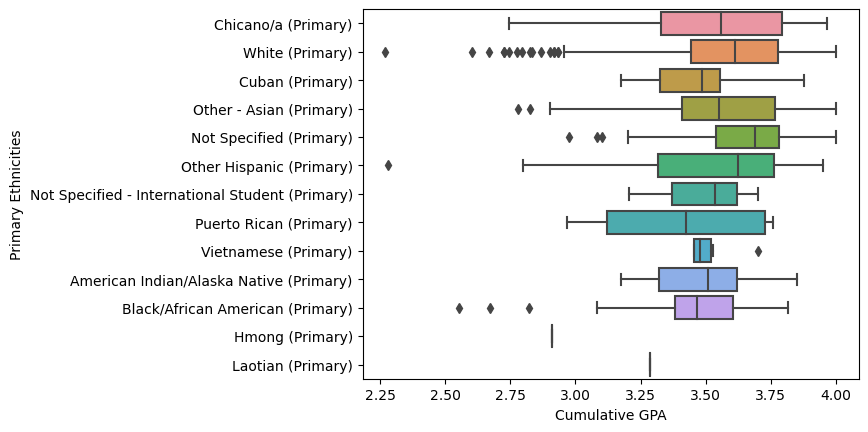

In [11]:
def extract_primary_ethnicity(values):
    if pd.isna(values):
        return values
    ethnicity_list = [value.strip() for value in values.split(',') if '(Primary)' in value]
    return ', '.join(ethnicity_list)
df['Primary Ethnicities'] = df['Student Ethnicity'].apply(extract_primary_ethnicity)

sns.boxplot(data=df, x="Cumulative GPA", y="Primary Ethnicities")

## All applicants

In [12]:
df_all = pd.read_excel("SUBSET applied 16-24.xlsx") #all students who applied
df_all.drop(df_all.columns[31:83], axis=1, inplace=True)

app_date = [col for col in df_all.columns if col.startswith('Application Start Date...')]

mask = (df_all['RECRUITMENT_CATEGORY_CODE'].isnull()) & (df_all['First Generation'] == 'Y')
df_all.loc[mask, 'RECRUITMENT_CATEGORY_CODE'] = 'FGEN'
df_all['RECRUITMENT_CATEGORY_CODE'].fillna('N', inplace=True)
df_all['TARGETED_MINORITY'].fillna('N', inplace=True)

to_drop = ['Last Name', 'First Name', 'Preferred First Name', 'EmplID', 'NetID', "CAMPUS_ID", "Virtual Session", "First Generation", "Student Ethnicity", "COUNTRY (Session)"] + app_date
df_all.drop(to_drop, axis=1, inplace=True)

df_all.columns

Index(['Campus ID', 'COUNTRY (Program)', 'CITY (Program)', 'CITY (Session)',
       'IAP Official Title', 'IAP Short Descriptor', 'Year', 'Duration',
       'Application Status', 'STUDENT RESIDENCY', 'Gender',
       'Academic Standing at Application', 'Credits at Application',
       'School at Application', 'Academic Career', 'Cumulative GPA',
       'World Region', 'Application Status Date', 'SIS Citizenship',
       'Virtual Program', 'Birthdate', 'Campus Email Address', 'Location',
       'Location 2', 'Location 3', 'Location 4', 'GENDER', 'CITIZEN',
       'RESIDENT_STATUS', 'ETHNIC_REPORTING_DESCR', 'TARGETED_MINORITY',
       'RECRUITMENT_CATEGORY_CODE'],
      dtype='object')

In [13]:
#make gpa_buckets
df_all["gpa_buckets"] = df_all["Cumulative GPA"].apply(lambda x: "3.5 - 4.0" if x>=3.5 \
                                           else ("3.0 - 3.5" if (x<3.5 and x>=3) \
                                                else ("2.5 - 3.0" if (x<3.5 and x>=3) \
                                                     else (" < 2.5" ) )))

In [108]:
df_all["Application Status"] = df_all["Application Status"].apply(lambda x: "In progress" if x in ['Prospect (application incomplete)', 'Applicant (forms incomplete)', "Applicant (forms complete)" ] else x)

#Binaries of accept/decline and gpa below/above 3.0
df_yesno = df_all[~df_all["Application Status"].isin(['In progress', 'Withdrew'])] #ALL APPLICANTS WITH YES/NO DENIED
df_yesno["Binary app status"] = df_yesno["Application Status"].apply(lambda x: 0 if x in ['Declined', 'Not Reviewed', 'Rejected'] else 1)
df_yesno["Binary gpa"] = df_yesno["Cumulative GPA"].apply(lambda x: 0 if x<3 else 1)

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\1609185154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yesno["Binary app status"] = df_yesno["Application Status"].apply(lambda x: 0 if x in ['Declined', 'Not Reviewed', 'Rejected'] else 1)
C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\1609185154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yesno["Binary gpa"] = df_yesno["Cumulative GPA"].apply(lambda x: 0 if x<3 else 1)


In [88]:
df_yesno[(df_yesno["Binary gpa"]==0)]["Binary app status"].value_counts() # students below 3.0 accepts/denies

Binary app status
1    141
0    109
Name: count, dtype: int64

In [16]:
df_yesno[ df_yesno["Binary app status"]==1][["ETHNIC_REPORTING_DESCR", "Cumulative GPA"]].groupby(["ETHNIC_REPORTING_DESCR"]).mean()

,Cumulative GPA
ETHNIC_REPORTING_DESCR,
African American,3.313861
American Indian,3.422250
Asian,3.474201
Hispanic,3.397108
International,3.533154
Native Hawaiian,3.131500
Two or More Races,3.457514
Unknown,3.579725
White,3.543402


In [17]:
# white people denied
df_all[ (df_all["ETHNIC_REPORTING_DESCR"].isin(["White"])==True) & (df_all["Application Status"].isin(["Declined", "Rejected", "Not Reviewed"])==True) ]["gpa_buckets"].value_counts()

gpa_buckets
3.5 - 4.0    430
3.0 - 3.5    262
 < 2.5        71
Name: count, dtype: int64

In [18]:
# non-white people denied
df_all[ (df_all["ETHNIC_REPORTING_DESCR"].isin(["White"])==False) & (df_all["Application Status"].isin(["Declined", "Rejected", "Not Reviewed"])==True) ]["gpa_buckets"].value_counts()

gpa_buckets
3.0 - 3.5    123
3.5 - 4.0    113
 < 2.5        51
Name: count, dtype: int64

In [19]:
# non-white gpa distribution
df_all[ (df_all["ETHNIC_REPORTING_DESCR"].isin(["White"])==False)]["gpa_buckets"].value_counts()

gpa_buckets
3.0 - 3.5    522
3.5 - 4.0    504
 < 2.5       149
Name: count, dtype: int64

In [20]:
# white gpa distribution
df_all[ (df_all["ETHNIC_REPORTING_DESCR"].isin(["White"])==True)]["gpa_buckets"].value_counts()

gpa_buckets
3.5 - 4.0    2356
3.0 - 3.5    1393
 < 2.5        196
Name: count, dtype: int64

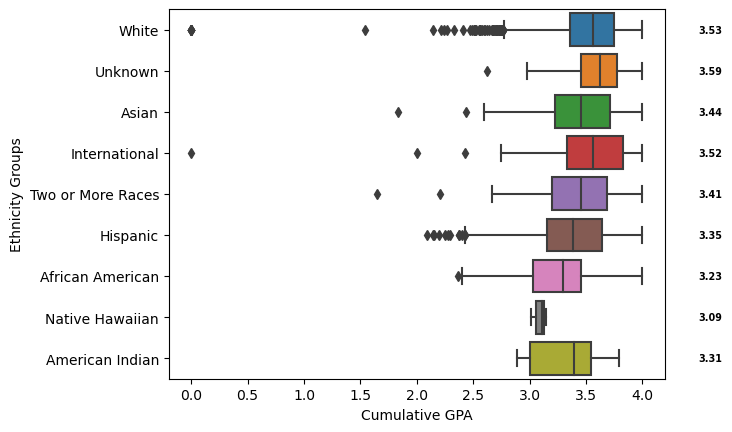

In [21]:
box_plot = sns.boxplot(x="Cumulative GPA", y="ETHNIC_REPORTING_DESCR", data=df_all, orient="h")

medians = df_all.groupby(['ETHNIC_REPORTING_DESCR'])['Cumulative GPA'].mean()
vertical_offset = df_all['Cumulative GPA'].median() * 0.05  # offset from median for display


for i, tick_label in enumerate(box_plot.get_yticklabels()):
    box_plot.text(4.5, i, f'{medians[tick_label.get_text()]:.2f}',
                  verticalalignment='center', size='x-small', color='black', weight='semibold')

plt.xlabel('Cumulative GPA')
plt.ylabel('Ethnicity Groups')

# Show plot
plt.show()

<Axes: xlabel='Cumulative GPA', ylabel='Binary app status'>

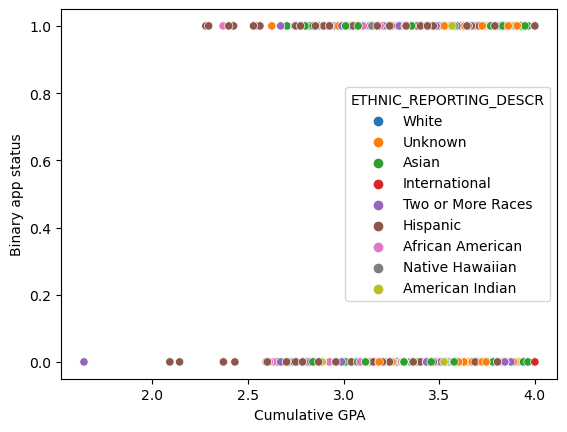

In [22]:
# graph accepted/declined binary v. gpa colored by ethnicity
sns.scatterplot(x= df_yesno[df_yesno["ETHNIC_REPORTING_DESCR"]!="White"]["Cumulative GPA"], y = df_yesno["Binary app status"], hue=df_yesno['ETHNIC_REPORTING_DESCR']) # non-white students 
#sns.scatterplot(x= df_yesno["Cumulative GPA"], y = df_yesno["Binary app status"], hue=df_yesno['ETHNIC_REPORTING_DESCR']) 

C:\Users\kmconrad3\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


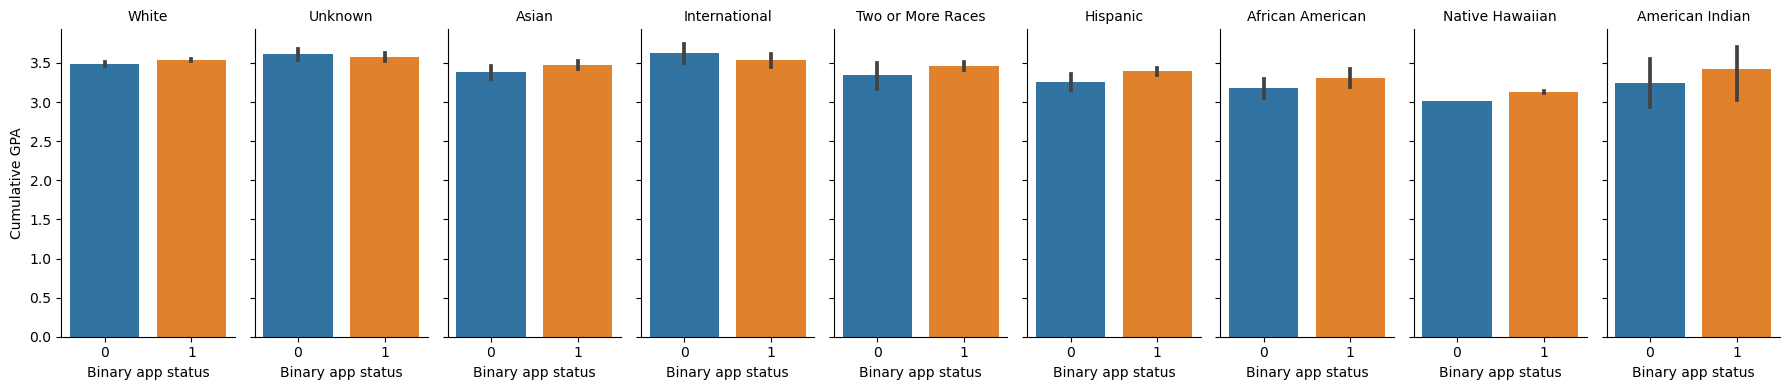

In [23]:
# avg gpa for accept/deny by race
p= sns.catplot(
    df_yesno, kind="bar",
    x="Binary app status", y="Cumulative GPA", col="ETHNIC_REPORTING_DESCR",
    height=4, aspect=.5,
)
p.set_titles("{col_name}");

<Axes: xlabel='Binary app status', ylabel='Cumulative GPA'>

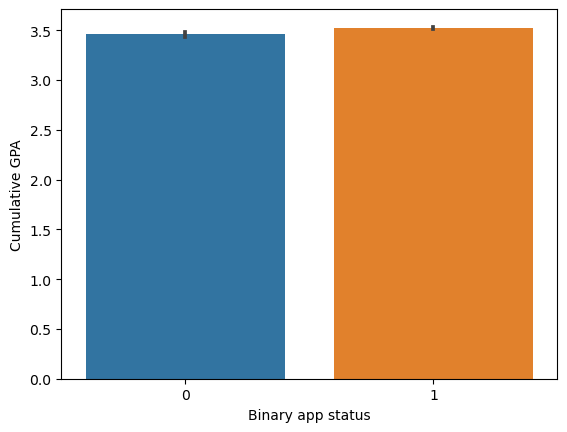

In [24]:
# overall gpa avg. accepted/denied
sns.barplot(df_yesno, x="Binary app status", y="Cumulative GPA", orient="v")

<Axes: xlabel='Binary app status', ylabel='count'>

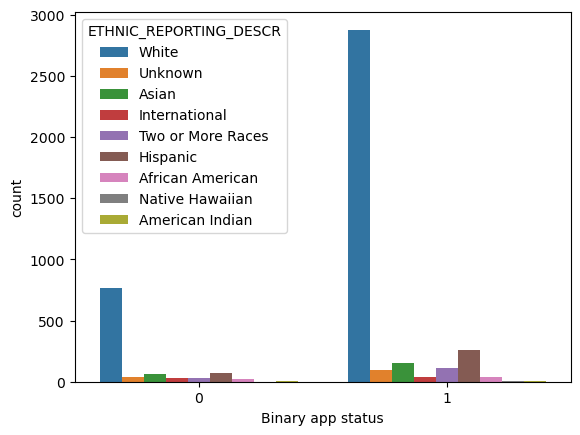

In [25]:
# student count by accept/denied and race
sns.countplot(df_yesno, x="Binary app status", hue="ETHNIC_REPORTING_DESCR") #accepted or not by race

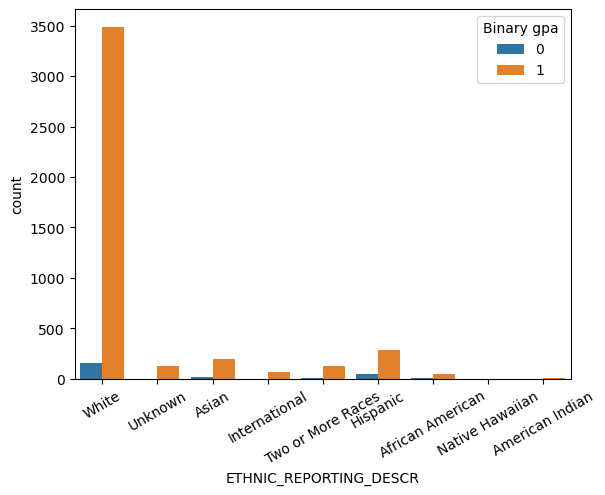

In [26]:
# student count of gpa below/above 3 by race
_g = sns.countplot(df_yesno, x="ETHNIC_REPORTING_DESCR", hue="Binary gpa") #above/below 3.0
_g.set_xticklabels(_g.get_xticklabels(), rotation=30);

<Axes: xlabel='gpa_buckets', ylabel='count'>

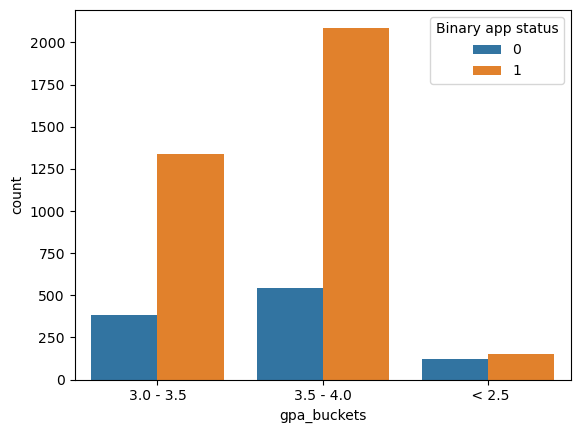

In [27]:
# gpa accepted/denied count by gpa buckets
sns.countplot(df_yesno, x="gpa_buckets", hue="Binary app status") #accepted or not by gpa groupings

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\786410310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yesno["Binary app status"]=df_yesno["Binary app status"].astype("str")


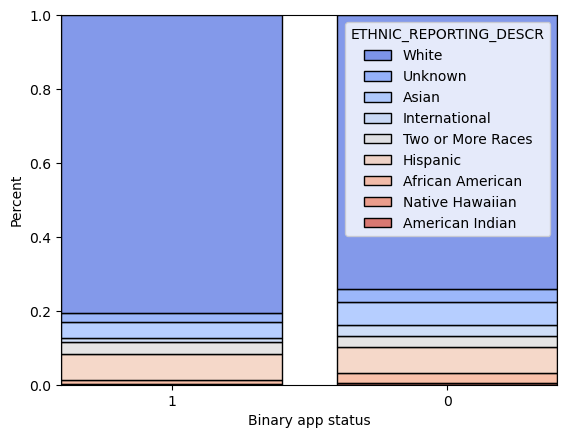

In [28]:
# of accepted/denied what percept are from each race
df_yesno["Binary app status"]=df_yesno["Binary app status"].astype("str")
ax = sns.histplot(data=df_yesno, x="Binary app status", hue="ETHNIC_REPORTING_DESCR", palette="coolwarm", stat="percent",  multiple="fill", shrink=.8)
ax;

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\3237994722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yesno["Binary app status"]=df_yesno["Binary app status"].astype("str")


22% (0.0, 0.22211675367821546)
27% (0.0, 0.2746987951807228)
77% (0.22211675367821546, 0.7778832463217845)
72% (0.2746987951807228, 0.7253012048192772)


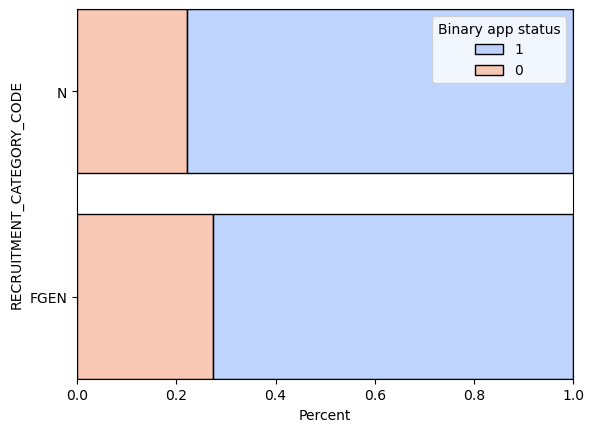

In [29]:
# Of accepted and denied what proportion are FGEN v N
df_yesno["Binary app status"]=df_yesno["Binary app status"].astype("str")
ax = sns.histplot(data=df_yesno, y="RECRUITMENT_CATEGORY_CODE", hue="Binary app status", palette="coolwarm", stat="percent",  multiple="fill", shrink=.8)

for p in ax.patches:
    #ax.annotate(str(int(p.get_width()*100))+'%', (p.get_x(), p.get_width())) 
    print(str(int(p.get_width()*100))+'%', (p.get_x(), p.get_width()))
ax;

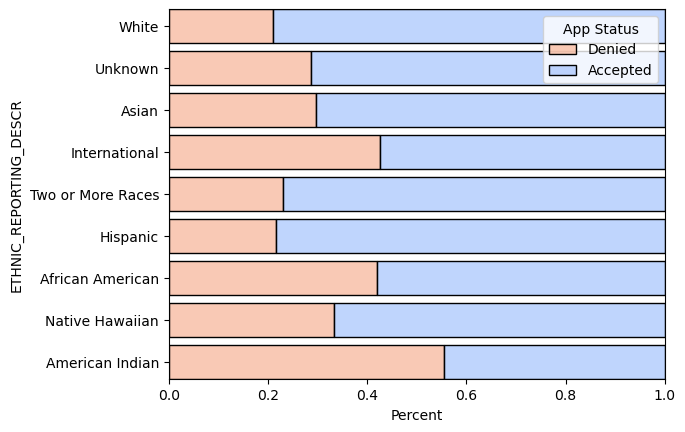

In [30]:
#By race accepted/denied ratios
ax = sns.histplot(data=df_yesno, y="ETHNIC_REPORTING_DESCR", hue="Binary app status", palette="coolwarm", stat="percent",  multiple="fill", shrink=.8)
plt.legend(title='App Status', loc='upper right', labels=['Denied', 'Accepted'])
plt.show(ax)

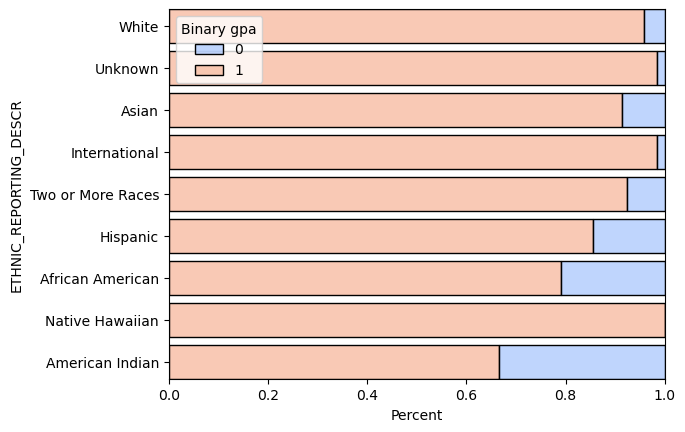

In [31]:
# By race affected by 3.0 limit ratios
ax = sns.histplot(data=df_yesno, y="ETHNIC_REPORTING_DESCR", hue="Binary gpa", palette="coolwarm", stat="percent",  multiple="fill", shrink=.8)

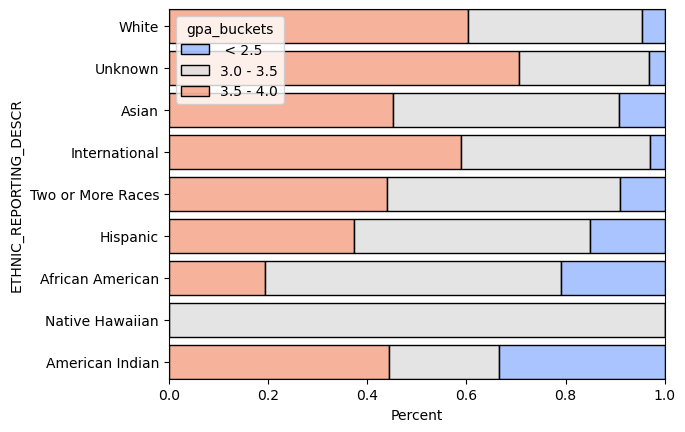

In [32]:
# By race which proportions are in each gpa bucket
ax = sns.histplot(data=df_yesno, y="ETHNIC_REPORTING_DESCR", hue="gpa_buckets", hue_order=[' < 2.5', '3.0 - 3.5', '3.5 - 4.0'], palette="coolwarm", stat="percent",  multiple="fill", shrink=.8)
ax;

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\4279698278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yesno["whiteorno"] = df_yesno["ETHNIC_REPORTING_DESCR"].apply(lambda x: "W" if x=="White" else "No")


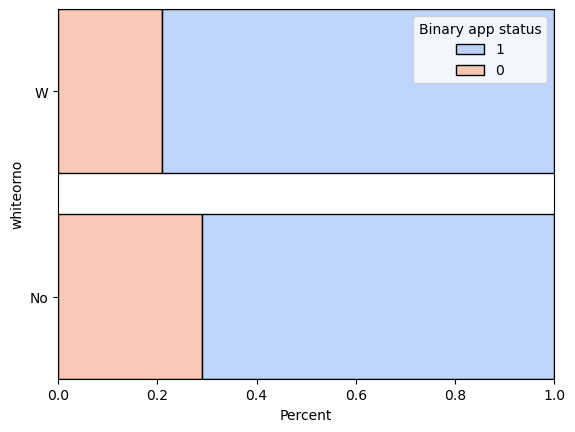

In [33]:
# By White or all else proportions of accept/deny
df_yesno["whiteorno"] = df_yesno["ETHNIC_REPORTING_DESCR"].apply(lambda x: "W" if x=="White" else "No")
ax = sns.histplot(data=df_yesno, y="whiteorno", hue="Binary app status", palette="coolwarm", stat="percent",  multiple="fill", shrink=.8);

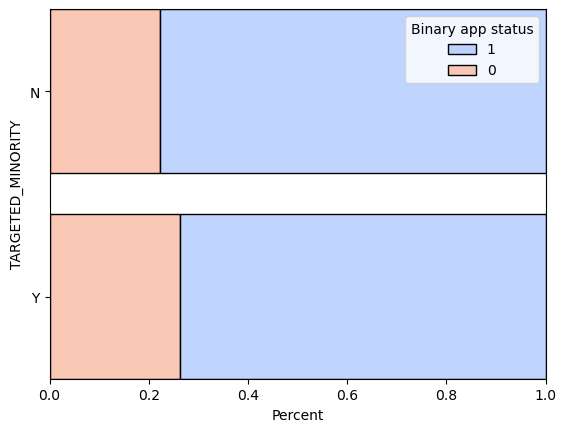

In [34]:
# By targeted minority proportions of accept/deny
df_yesno["TARGETED_MINORITY"].value_counts() 
ax = sns.histplot(data=df_yesno, y="TARGETED_MINORITY", hue="Binary app status", palette="coolwarm", stat="percent",  multiple="fill", shrink=.8)

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\4133284589.py:2: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.kdeplot(df_all[df_all['ETHNIC_REPORTING_DESCR']!="White"], x ='Cumulative GPA', hue='ETHNIC_REPORTING_DESCR', palette=sns.cubehelix_palette(start=2), fill=True)


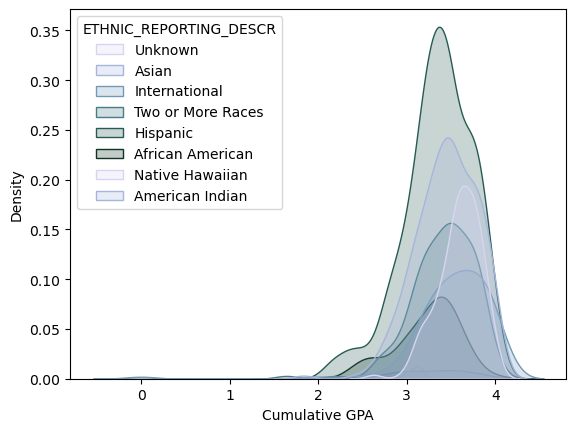

In [35]:
#density plot of GPAs by ethnicity EXCLUDING WHITE
ax = sns.kdeplot(df_all[df_all['ETHNIC_REPORTING_DESCR']!="White"], x ='Cumulative GPA', hue='ETHNIC_REPORTING_DESCR', palette=sns.cubehelix_palette(start=2), fill=True)
sns.move_legend(ax, "upper left")
fig = ax.get_figure()

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\2250450829.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.kdeplot(df_yesno, x ='Cumulative GPA', hue='Binary app status', palette=sns.cubehelix_palette(start=2), fill=True) #denied vs accepted distribution


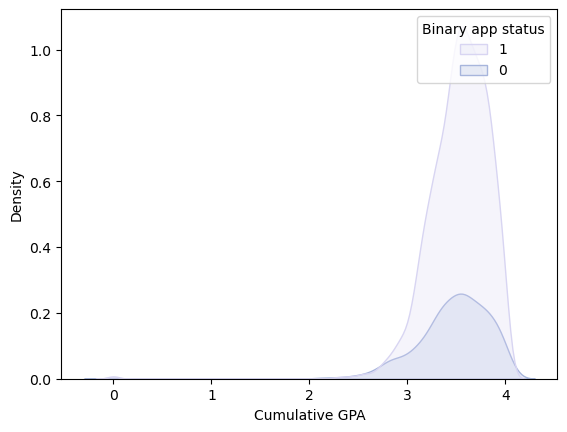

In [36]:
#overall gpa density of denies/accepted
ax = sns.kdeplot(df_yesno, x ='Cumulative GPA', hue='Binary app status', palette=sns.cubehelix_palette(start=2), fill=True) #denied vs accepted distribution
ax;

In [37]:
#linear regression GPA on ACCEPT STATUS (just applicants)

lin_yesno = df_yesno[["Cumulative GPA", "Binary app status"]].dropna()

x= lin_yesno[["Cumulative GPA"]]
y= lin_yesno[["Binary app status"]].astype("float")

print( sm.OLS(y, sm.add_constant(x.astype(float))).fit().summary() ) 

                            OLS Regression Results                            
Dep. Variable:      Binary app status   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     31.83
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.78e-08
Time:                        12:14:56   Log-Likelihood:                -2497.9
No. Observations:                4603   AIC:                             5000.
Df Residuals:                    4601   BIC:                             5013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4107      0.065      6.

In [38]:
#linear regression RACE & Applied status ON GPA (just applicants)

df_yesno["Cumulative_GPA"] = df_yesno["Cumulative GPA"]
df_yesno["TARGETED_MINORITYY"] = df_yesno["TARGETED_MINORITY"].apply(lambda x: 0 if x=="N" else 1)
df_yesno["Binary_app_status"] = df_yesno["Binary app status"].apply(lambda x: 1 if x==0 else 0) #0 is now accepted, 1 denied
model = ols("""Cumulative_GPA ~ TARGETED_MINORITYY + Binary_app_status""", data=df_yesno)

fitted_model = model.fit() 

print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Cumulative_GPA   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     114.5
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           2.08e-26
Time:                        12:14:56   Log-Likelihood:                -1426.2
No. Observations:                4603   AIC:                             2856.
Df Residuals:                    4601   BIC:                             2869.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.5285      0

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\20440452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yesno["Cumulative_GPA"] = df_yesno["Cumulative GPA"]
C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\20440452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yesno["TARGETED_MINORITYY"] = df_yesno["TARGETED_MINORITY"].apply(lambda x: 0 if x=="N" else 1)
C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\20440452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

## All BBA students

In [39]:
df_allpll = pd.read_excel("all bba students.xlsx")

df_all["Abroad bi"]=1
#df_all.join(df_allpll, on="Campus ID", how='left', lsuffix='_left', rsuffix='_right') #what do the suffixes do??
#df_EVERYTHING = pd.merge(df_all, df_ethnic[["ETHNIC_REPORTING_DESCR", "Campus ID", "GPA_CUM"]], on="Campus ID", how='left')
#df_EVERYTHING["Abroad bi"] = df_EVERYTHING["Abroad bi"].apply(lambda x: x if x==1 else 0)
#df_EVERYTHING.drop("ETHNIC_REPORTING_DESCR_y", axis=1, inplace=True)

#df_allpll.join(df_all, on="Campus ID", how='left', lsuffix='_left', rsuffix='_right') #what do the suffixes do??
df_EVERYTHING = pd.merge(df_all, df_allpll[["ETHNIC_REPORTING_DESCR", "Campus ID", "GPA_CUM", "TERM", "TARGETED_MINORITY"]], on="Campus ID", how='right')
df_EVERYTHING["Abroad bi"] = df_EVERYTHING["Abroad bi"].apply(lambda x: x if x==1 else 0)

df_EVERYTHING["TARGETED_MINORITY_y"] = df_EVERYTHING["TARGETED_MINORITY_y"].apply(lambda x: x if x!=" Y" else "N")
df_EVERYTHING["TARGETED_MINORITY_y"].value_counts()

df_EVERYTHINGg = df_EVERYTHING.groupby(["Campus ID"])["TERM"].transform("max") == df_EVERYTHING["TERM"]
df_EVERYTHING = df_EVERYTHING[df_EVERYTHINGg]

means = df_EVERYTHING.groupby(['ETHNIC_REPORTING_DESCR_y'])['GPA_CUM'].mean() #why does Cumulative GPA give me different values?
df_EVERYTHING[df_EVERYTHING["RECRUITMENT_CATEGORY_CODE"]=="FGEN"]["GPA_CUM"].mean()

3.45173546856465

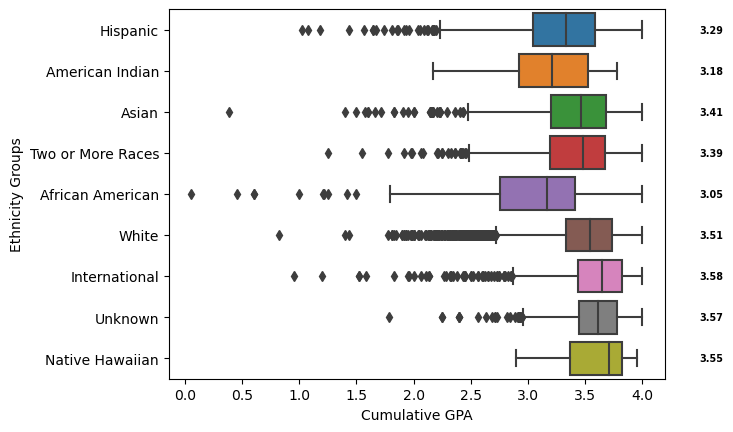

In [40]:
box_plot = sns.boxplot(x="GPA_CUM", y="ETHNIC_REPORTING_DESCR_y", data=df_EVERYTHING, orient="h")

medians = df_EVERYTHING.groupby(['ETHNIC_REPORTING_DESCR_y'])['GPA_CUM'].mean()
vertical_offset = df_EVERYTHING['GPA_CUM'].median() * 0.05  # offset from median for display


for i, tick_label in enumerate(box_plot.get_yticklabels()):
    box_plot.text(4.5, i, f'{medians[tick_label.get_text()]:.2f}',
                  verticalalignment='center', size='x-small', color='black', weight='semibold')

plt.xlabel('Cumulative GPA')
plt.ylabel('Ethnicity Groups')

# Show plot
plt.show()

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\624739266.py:2: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.kdeplot(df_EVERYTHING[(df_EVERYTHING['ETHNIC_REPORTING_DESCR_y']!="White") & (df_EVERYTHING['Abroad bi']==1)], x ='GPA_CUM', hue='ETHNIC_REPORTING_DESCR_y',palette=sns.cubehelix_palette(start=2), fill=True)


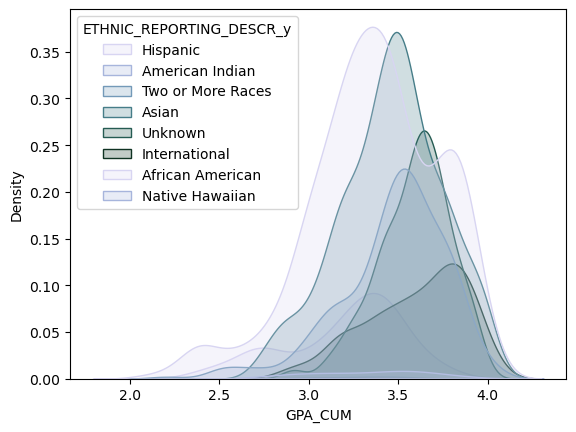

In [41]:
#density plot by race of gpa of students who did apply abroad
ax = sns.kdeplot(df_EVERYTHING[(df_EVERYTHING['ETHNIC_REPORTING_DESCR_y']!="White") & (df_EVERYTHING['Abroad bi']==1)], x ='GPA_CUM', hue='ETHNIC_REPORTING_DESCR_y',palette=sns.cubehelix_palette(start=2), fill=True)
sns.move_legend(ax, "upper left");

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\3152180506.py:2: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.kdeplot(df_EVERYTHING[(df_EVERYTHING['ETHNIC_REPORTING_DESCR_y']!="White") & (df_EVERYTHING['Abroad bi']==0)], x ='GPA_CUM', hue='ETHNIC_REPORTING_DESCR_y',palette=sns.cubehelix_palette(start=2), fill=True)


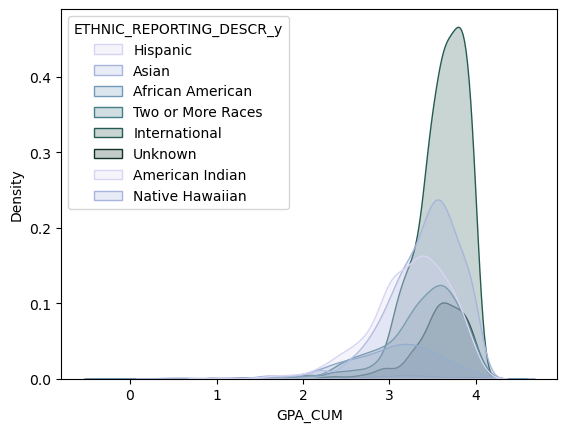

In [42]:
#density plot by race of gpa of students who didn't apply abraod
ax = sns.kdeplot(df_EVERYTHING[(df_EVERYTHING['ETHNIC_REPORTING_DESCR_y']!="White") & (df_EVERYTHING['Abroad bi']==0)], x ='GPA_CUM', hue='ETHNIC_REPORTING_DESCR_y',palette=sns.cubehelix_palette(start=2), fill=True)
sns.move_legend(ax, "upper left") #NOT ABROAD

In [43]:
df_EVERYTHING["TARGETED_MINORITY_x"].value_counts()

TARGETED_MINORITY_x
N    7815
Y     981
Name: count, dtype: int64

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\3828452451.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.kdeplot(df_EVERYTHING[df_EVERYTHING["TARGETED_MINORITY_y"].isnull()==True], x ='GPA_CUM', hue='Abroad bi',palette=sns.cubehelix_palette(start=2), fill=True)


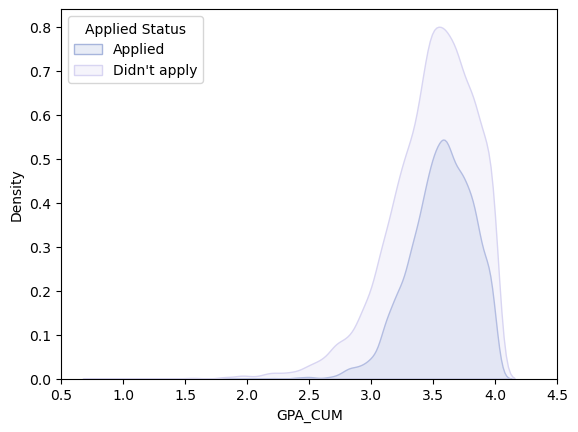

In [44]:
#overall gpa density by applied vs. not applied
from matplotlib.ticker import MultipleLocator

ax = sns.kdeplot(df_EVERYTHING[df_EVERYTHING["TARGETED_MINORITY_y"].isnull()==True], x ='GPA_CUM', hue='Abroad bi',palette=sns.cubehelix_palette(start=2), fill=True)
plt.legend(title='Applied Status', loc='upper left', labels=['Applied', 'Didn\'t apply'])
plt.xlim([0.5, 4.5])
ax.xaxis.set_major_locator(MultipleLocator(0.5))
plt.show(ax);

#df_EVERYTHING[df_EVERYTHING["ETHNIC_REPORTING_DESCR_y"]!="White"]['GPA_CUM'].mean()
#df_EVERYTHING[df_EVERYTHING["TARGETED_MINORITY_y"]!="N"]['GPA_CUM'].mean()

C:\Users\kmconrad3\AppData\Local\Temp\ipykernel_4376\2472879580.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.kdeplot(df_yesno[df_yesno["Binary app status"]!=1], x ='Cumulative GPA', hue='TARGETED_MINORITY',palette=sns.cubehelix_palette(start=2), fill=True)


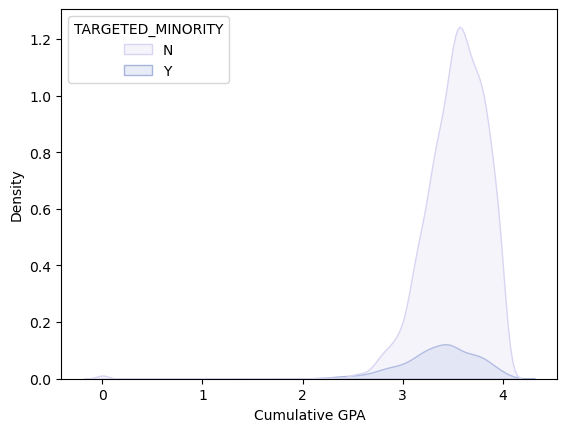

In [45]:
ax = sns.kdeplot(df_yesno[df_yesno["Binary app status"]!=1], x ='Cumulative GPA', hue='TARGETED_MINORITY',palette=sns.cubehelix_palette(start=2), fill=True)
sns.move_legend(ax, "upper left");

In [46]:
df_allpll[df_allpll["FGEN_CT"]==0]["GPA_CUM"].mean()

3.4982811566274443

In [47]:
df_allpll[df_allpll["FGEN_CT"]==1]["GPA_CUM"].mean()

3.3512863714778605

In [48]:
lin_yesno = df_allpll[["GPA_CUM", "FGEN_CT"]].dropna()

x= lin_yesno[["FGEN_CT"]].astype("int")
y= lin_yesno[["GPA_CUM"]].astype("float")

print( sm.OLS(y, sm.add_constant(x.astype(float))).fit().summary() )

                            OLS Regression Results                            
Dep. Variable:                GPA_CUM   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     590.8
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          3.73e-130
Time:                        12:15:39   Log-Likelihood:                -39437.
No. Observations:              106225   AIC:                         7.888e+04
Df Residuals:                  106223   BIC:                         7.890e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4983      0.001   3196.969      0.0

In [49]:
df_allpll["TERM"].unique()
df_allpll = df_allpll[df_allpll["TERM"].astype("str").str[3] != "6"] #drop summer term

df_allpll["Above/not"]= df_allpll["GPA_CUM"].apply( lambda x: 0 if x>=3.0 else 1)

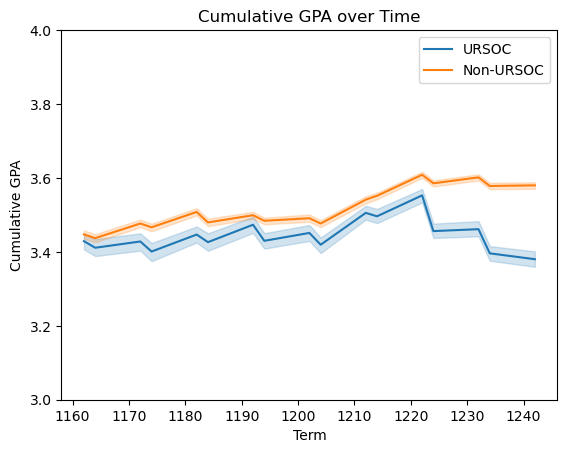

In [50]:
#gpa avg over time by white/non race

#plt.plot(df_allpll["TERM"], df_allpll["GPA_CUM"])
#sns.lineplot(data=df_allpll, x="TERM", y="GPA_CUM")

sns.lineplot(data=df_allpll[df_allpll["ETHNIC_REPORTING_DESCR"]!="White"], x="TERM", y="GPA_CUM", label="URSOC")
sns.lineplot(data=df_allpll[df_allpll["ETHNIC_REPORTING_DESCR"]=="White"], x="TERM", y="GPA_CUM", label="Non-URSOC")
plt.xlabel('Term')
plt.ylabel('Cumulative GPA')
plt.ylim(3, 4)
plt.title('Cumulative GPA over Time');

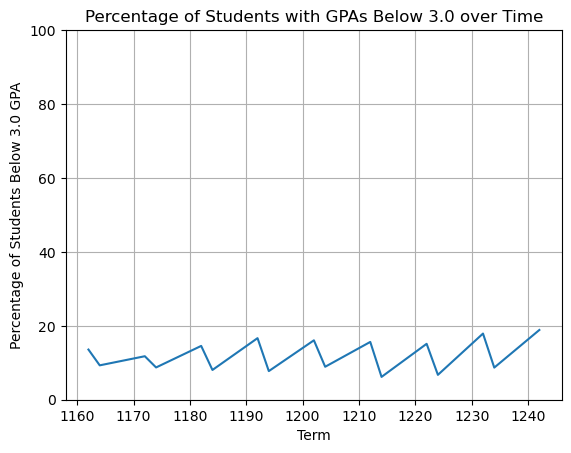

In [51]:
#percent of students with gpas below 3.0 over time
percentage_below_3 = df_allpll.groupby('TERM')['Above/not'].mean() * 100

sns.lineplot(x=percentage_below_3.index, y=percentage_below_3.values)

plt.xlabel('Term')
plt.ylabel('Percentage of Students Below 3.0 GPA')
plt.title('Percentage of Students with GPAs Below 3.0 over Time')
plt.ylim(0, 100)
plt.grid(True) #why spring terms always lower --> because there are less students cuz winter grads

#switch to target minority or not, URSOC

In [52]:
#linear regression RACE ON GPA

#df_yesno["CumulativeGPA"] = df_yesno["Cumulative GPA"]
model = ols("""GPA_CUM ~ C(ETHNIC_REPORTING_DESCR_y, Treatment(reference='White'))""", data=df_EVERYTHING)

fitted_model = model.fit() 

print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                GPA_CUM   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     206.8
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:15:41   Log-Likelihood:                -8462.9
No. Observations:               25189   AIC:                         1.694e+04
Df Residuals:                   25180   BIC:                         1.702e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

# PROBATION DATA

In [135]:
probation = pd.read_excel("all probation records.xlsx")
probation = probation[probation["PROBATION_ACTION_CODE"].isnull()==False]
probation["TERM"] = probation["TERM"].apply(lambda x: x+6 if str(x)[3]=="6" else x)
probation= probation.rename({"CAMPUS_ID":"Campus ID"}, axis='columns')

In [138]:
abroad_apps = df_yesno[df_yesno["Binary app status"]==1] #all accepted students
abroad_apps = abroad_apps[abroad_apps["Duration"]!="Summer"]

abroad_apps.drop(["RECRUITMENT_CATEGORY_CODE", "Location 2", "Location 3", "Location 4"], axis=1, inplace=True)

In [139]:
abroad_apps["TERM -1"] = abroad_apps["Year"].astype(str) + abroad_apps["Duration"]
abroad_apps["TERM -1"].value_counts()

to_drop = ['2024Winter Intersession', '2022Spring break module', '2024Spring break module', '2018Spring break module', '2023Spring break module', \
           "2020Spring break module", "2019Spring break module"]   

abroad_apps = abroad_apps.loc[~abroad_apps['TERM -1'].isin(to_drop)]

In [140]:
def term_create(row):
    if len(row.split("Spring"))==2: #Spring term codes
        x = int(row.split("Spring")[0][2:4])*10
        x+= 1004
        return int(x)
    if len(row.split("Fall"))==2: #Fall term codes
        x = int(row.split("Fall")[0][2:4])*10
        x+= 1012
        return int(x)

abroad_apps["TERM -1"] = abroad_apps["TERM -1"].apply(term_create)

In [141]:
def term_back(row):
    if  (row %10==4): #Spring term codes
        return row-2
    if (row%10==2): #Fall term codes
        return row-8
    
abroad_apps["TERM"] = abroad_apps["TERM -1"].apply(term_back)

In [142]:
probation.drop_duplicates(inplace=True)
abroad_apps.drop_duplicates(inplace=True)
merged = pd.merge(probation, abroad_apps, on=["Campus ID", "TERM"], how='right') #895 probations
merged = merged[merged["PROBATION_ACTION_CODE"].isnull()==False]

In [146]:
#merged.drop_duplicates(inplace=True, ignore_index=True)
pd.set_option('display.max_columns', None)
merged

,Campus ID,ID,NAME,TERM,ADMIT_TYPE,ACADEMIC_LEVEL,TERM_TAKEN_CREDITS_TOTAL,TERM_GPA,CUM_CREDITS_TOTAL,CUM_GPA,RESIDENCY,DROP_ACTION_DESCR,DROP_ACTION_CODE,PROBATION_ACTION_DESCR,PROBATION_ACTION_CODE,PERMISSION_ACTION_DESCR,PERMISSION_ACTION_CODE,CLEARING_ACTION_CODE,CLEARING_ACTION_DESCR,FIRST_SEMESTER_ENROLLED,GENDER_x,CITIZEN_STATUS,UW_MATH_ELEM_ALG,UW_MATH_INT_ALG,UW_MATH_COL_ALG,UW_MATH_TRIG,ETHNIC_REPORTING_DESCR_x,TARGETED_MINORITY_x,MINORITY,ADMIT_TYPE2,COUNTRY (Program),CITY (Program),CITY (Session),IAP Official Title,IAP Short Descriptor,Year,Duration,Application Status,STUDENT RESIDENCY,Gender,Academic Standing at Application,Credits at Application,School at Application,Academic Career,Cumulative GPA,World Region,Application Status Date,SIS Citizenship,Virtual Program,Birthdate,Campus Email Address,Location,GENDER_y,CITIZEN,RESIDENT_STATUS,ETHNIC_REPORTING_DESCR_y,TARGETED_MINORITY_y,gpa_buckets,Abroad bi,Binary app status,Binary gpa,TERM -1
134,9.068508e+09,5039406.0,"Karp,Jacob",1162.0,CON,30.0,14.0,1.964,80.0,2.943,N,NaN,NaN,Probation,PRO,NaN,NaN,NaN,NaN,1142.0,M,1.0,0.0,0.0,0.0,0.0,White,NaN,NaN,CNT,Spain,Barcelona,NaN,CIEE Barcelona Business and Culture,CIEE Barcelona Bus & Cltr,2016,Spring,Canceled,Non-Resident,M,Junior,66.0,College of Letters and Science,UGRD,3.188,Europe (Primary),12/23/2015,NaN,No,NaN,NaN,"Barcelona , Spain",M,Y,N,White,N,3.0 - 3.5,1,1,1,1164.0
1128,9.076509e+09,5776322.0,"Shapiro,Owen Michael",1202.0,CON,40.0,6.0,1.500,89.0,3.183,N,NaN,NaN,Probation,PRO,NaN,NaN,NaN,NaN,1182.0,M,1.0,0.0,0.0,0.0,0.0,Unknown,NaN,NaN,CNT,Hong Kong,Hong Kong,Hong Kong (Primary),City University of Hong Kong Exchange,CityU Exchange,2020,Spring,Canceled,Non-Resident,M,Junior,70.0,School of Business,UGRD,3.561,Asia (Primary),10/4/2019,NaN,No,NaN,NaN,"Hong Kong , Hong Kong",M,Y,N,Unknown,N,3.5 - 4.0,1,1,1,1204.0
1218,9.076082e+09,5734746.0,"St. Thomas,Matthew Lange",1202.0,CON,30.0,6.0,1.250,70.0,2.714,R,NaN,NaN,Probation,PRO,NaN,NaN,API,Action Pend Remove Incomplete,1182.0,M,1.0,0.0,0.0,0.0,0.0,White,NaN,NaN,CNT,Italy,Rome,Rome (Primary),CEA Rome Business & Psychology,CEA Rome Bus & Psy,2020,Spring,Participant,Wisconsin,M,Sophomore,53.0,School of Business,UGRD,3.047,Europe (Primary),8/13/2019,NaN,No,NaN,NaN,"Rome , Italy",M,Y,Y,White,N,3.0 - 3.5,1,1,1,1204.0
1342,9.076082e+09,5734746.0,"St. Thomas,Matthew Lange",1202.0,CON,30.0,6.0,1.250,70.0,2.714,R,NaN,NaN,Probation,PRO,NaN,NaN,API,Action Pend Remove Incomplete,1182.0,M,1.0,0.0,0.0,0.0,0.0,White,NaN,NaN,CNT,Spain,Barcelona,Barcelona (Primary),CIEE Barcelona Business and Culture,CIEE Barcelona Bus & Cltr,2020,Spring,Canceled,Wisconsin,M,Junior,70.0,School of Business,UGRD,2.714,Europe (Primary),NaN,NaN,No,NaN,NaN,"Barcelona , Spain",M,Y,Y,White,N,< 2.5,1,1,0,1204.0
1356,9.075835e+09,5712473.0,"Wolfinger,Michael Tyler",1202.0,CON,20.0,3.0,NaN,51.0,3.137,R,NaN,NaN,Probation,PRO,NaN,NaN,NaN,NaN,1182.0,M,1.0,0.0,0.0,0.0,0.0,White,NaN,NaN,CNT,Spain,Barcelona,Barcelona (Primary),CIEE Barcelona Business and Culture,CIEE Barcelona Bus & Cltr,2020,Spring,Canceled,Wisconsin,M,Sophomore,41.0,School of Business,UGRD,3.220,Europe (Primary),12/23/2019,NaN,No,NaN,NaN,"Barcelona , Spain",M,Y,Y,White,N,3.0 - 3.5,1,1,1,1204.0
1705,9.077739e+09,5885773.0,"Minley,Kevin Charles",1212.0,CON,30.0,14.0,2.250,72.0,3.150,R,NaN,NaN,Probation,PRO,NaN,NaN,CLR,Cleared of Previous Action,1186.0,M,1.0,0.0,0.0,0.0,0.0,Hispanic,Y,Y,CNT,Spain,Barcelona,NaN,CIEE Barcelona Business and Culture,CIEE Barcelona Bus & Cltr,2021,Spring,Canceled,Wisconsin,M,Junior,58.0,School of Business,UGRD,3.424,Europe (Primary),9/29/2020,NaN,No,NaN,NaN,"Barcelona , Spain",M,Y,Y,Hispanic,Y,3.0 - 3.5,1,1,1,1214.0
1926,9.079686e+09,6061010.0,"Guarna,Benjamin",1222.0,RAD,30.0,9.0,0.000,68.0,2.412,N,NaN,NaN,Strict Probation,SPR,NaN,NaN,NaN,NaN,1192.0,M,1.0,0.0,0.0,0.0,0.0,White,NaN,NaN,RAD,Italy,Rome,NaN,CEA Rome Business & Psychology,CEA Rome Bus & Psy,2022,Spring,Canceled,Non-Resident,M,Sophomore,56.0,School of Business,U

In [149]:
merged["TERM"].value_counts() # 17 total, 15 unique students

TERM
1242.0    6
1202.0    4
1232.0    3
1222.0    2
1162.0    1
1212.0    1
Name: count, dtype: int64